# script to graph opentuner database 

In [1]:
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from matplotlib.ticker import MaxNLocator
import os.path

def graph_data(db_name):
    BASE_DIR = os.path.abspath('') # os.path.dirname(__file__) NOT ok with .ipynb
    db_path = os.path.join(BASE_DIR, db_name)
    dbase = sqlite3.connect(db_path)
    cursor = dbase.cursor()
    cursor.execute(''' 
    SELECT id, time FROM result 
    ''')
    data = cursor.fetchall()
    ids = []
    times = []
    for row in data:
        ids.append(row[0])
        times.append(row[1])
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.plot(ids,times, '-+', label='exec. time', linewidth=1)
    plt.xlabel("ID")
    plt.ylabel("Time")
    plt.show()
    dbase.close()

# result of BT

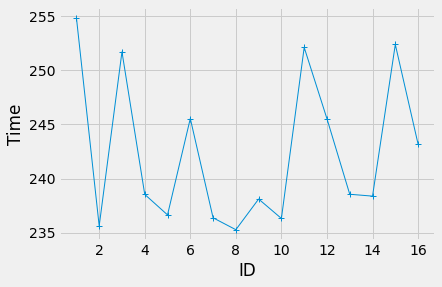

In [2]:
graph_data("calc5.bt.A.64.db")

# result of CG

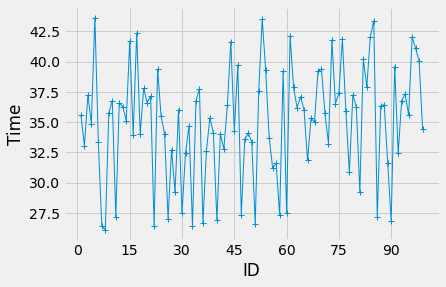

In [3]:
graph_data("calc5.cg.A.64.db")

# result of LU

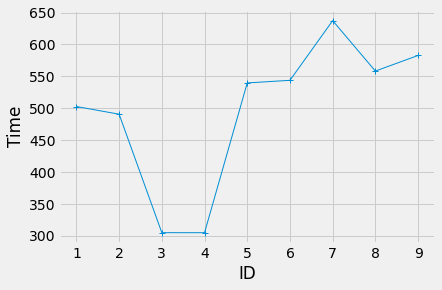

In [4]:
graph_data("calc5.lu.A.64.db")

# result of MG

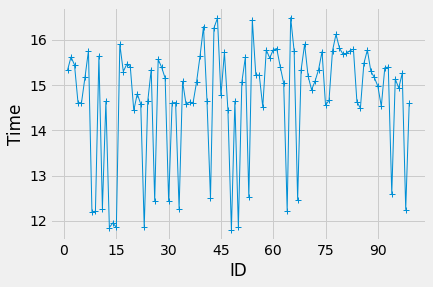

In [5]:
graph_data("calc5.mg.A.64.db")

# result of SP

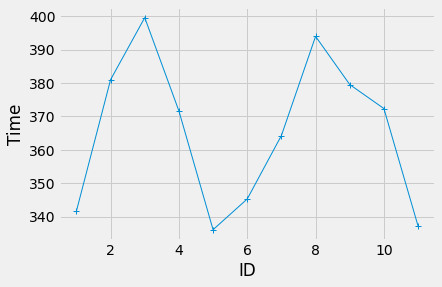

In [6]:
graph_data("calc5.sp.A.64.db")